In [85]:
import requests
import numpy as np
import xgboost
import matplotlib.pyplot as plt

In [ ]:
xgboost.__version__

In [128]:
payload = {
    'NAME_CONTRACT_TYPE': 'Revolving loans',
    'CODE_GENDER': 'M',
    'FLAG_OWN_CAR': 'N',
    'FLAG_OWN_REALTY': 'Y',
    'CNT_CHILDREN': 0.0,
    'AMT_INCOME_TOTAL': 202500.0,
    'AMT_CREDIT': 406597.5,
    'AMT_ANNUITY': 24700.5,
    'AMT_GOODS_PRICE': 351000.0,
    'NAME_INCOME_TYPE': 'Working',
    'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
    'NAME_FAMILY_STATUS': 'Single / not married',
    'NAME_HOUSING_TYPE': 'House / apartment',
    'DAYS_BIRTH': -9461,
    'DAYS_EMPLOYED': 637.0,
    'FLAG_MOBIL': 1.0,
    'FLAG_EMAIL': 0.0,
    'CNT_FAM_MEMBERS': 1.0,
    'ORGANIZATION_TYPE': 'Business Entity Type 3'
}

In [132]:
#register = requests.post("https://scoring-oc7.herokuapp.com/getPrediction", json=payload)
register = requests.post("http://127.0.0.1:8000/getPrediction", json=payload)
result = register.json()
result

{'Status': 'Success',
 'Prediction': 0,
 'User info': {'NAME_CONTRACT_TYPE': 'Cash loans',
  'CODE_GENDER': 'M',
  'FLAG_OWN_CAR': 'N',
  'FLAG_OWN_REALTY': 'Y',
  'CNT_CHILDREN': 0.0,
  'AMT_INCOME_TOTAL': 202500.0,
  'AMT_CREDIT': 406597.5,
  'AMT_ANNUITY': 24700.5,
  'AMT_GOODS_PRICE': 351000.0,
  'NAME_INCOME_TYPE': 'Working',
  'NAME_EDUCATION_TYPE': 'Secondary / secondary special',
  'NAME_FAMILY_STATUS': 'Single / not married',
  'NAME_HOUSING_TYPE': 'House / apartment',
  'DAYS_BIRTH': -9461,
  'DAYS_EMPLOYED': 637.0,
  'FLAG_MOBIL': 1.0,
  'FLAG_EMAIL': 0.0,
  'CNT_FAM_MEMBERS': 1.0,
  'ORGANIZATION_TYPE': 'Business Entity Type 3',
  'INCOME_CREDIT_RATE': 0.4980355265342261,
  'ANNUITY_INCOME_RATE': 0.12197777777777778,
  'PAYMENT_RATE': 0.06074926678103038},
 'Explainer map': {'Feature_idx': [0, 19, 21, 14, 7, 4],
  'Scaled_value': [-0.26233192802111216,
   0.054840500164391466,
   0.03921031933844192,
   -0.004465388994519708,
   -0.0032533657976985624,
   -0.002675968975485

In [102]:
result['Explainer map']

{'Feature_idx': [0, 19, 21, 14, 7, 4],
 'Scaled_value': [-0.26233192802111216,
  0.054840500164391466,
  0.03921031933844192,
  -0.004465388994519708,
  -0.0032533657976985624,
  -0.0026759689754851552]}

In [103]:
result['Explainer list']

[['NAME_CONTRACT_TYPE=Cash loans', -0.26233192802111216],
 ['INCOME_CREDIT_RATE > 0.44', 0.054840500164391466],
 ['PAYMENT_RATE > 0.06', 0.03921031933844192],
 ['DAYS_EMPLOYED <= 587.00', -0.004465388994519708],
 ['AMT_ANNUITY <= 17095.50', -0.0032533657976985624],
 ['CNT_CHILDREN <= 0.00', -0.0026759689754851552]]

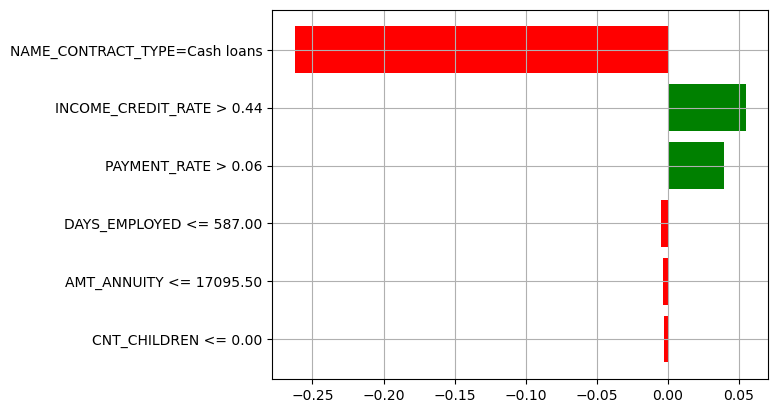

In [104]:
feature_list = [i for i in result['User info']]
names = []
colors = []

for i in result['Explainer list']:
    names.append(i[0])

for i in range(len(result['Explainer map']['Feature_idx'])):
#     names.append(feature_list[result['Explainer list'][i][0]])
    colors.append('green' if result['Explainer map']['Scaled_value'][i] > 0 else 'red')
values = [i for i in result['Explainer map']['Scaled_value']]


names.reverse()
values.reverse()
colors.reverse()

#print(names)

plt.barh(range(len(names)), values, tick_label=names, color=colors)

plt.grid()
plt.show()

In [133]:
result['Distributions']

{'PAYMENT_RATE': [0.06074926678103038,
  0.027598323157473605,
  0.05,
  0.09494135424911851,
  0.04262280701754386,
  0.05610143212323049,
  0.0264626846736711,
  0.0275,
  0.05,
  0.0324551724137931,
  0.07273233166388425,
  0.03153784345235762,
  0.04236632563441886,
  0.06725111084424162,
  0.05131352377588415,
  0.05,
  0.05,
  0.03225673151622341,
  0.05,
  0.03316473500395339,
  0.06536722141823444,
  0.05132727272727273,
  0.04922,
  0.02762930717801778,
  0.0728616248348745,
  0.0729316035051781,
  0.05,
  0.03693166459425853,
  0.04888744375703037,
  0.10498824167872649,
  0.05327720469565964,
  0.02924,
  0.09891,
  0.03611658934750111,
  0.03333663366336634,
  0.05,
  0.029347006484693107,
  0.048325586938386365,
  0.056282518615446926,
  0.07296405862151042,
  0.05,
  0.10296961325966851,
  0.027596666666666665,
  0.033134437117737,
  0.05,
  0.05125333333333333,
  0.03225742574257426,
  0.05146869178965468,
  0.05440232139498643,
  0.05,
  0.04257187824962761,
  0.0381944

In [ ]:


for i in result['Distributions']:


plt.hist(df['DAYS_EMPLOYED'], bins=60)
plt.ylabel('Counts')
plt.xlabel('Number of days of employment')
plt.title('Distribution of the number of days of employment', fontsize=12, fontweight='bold')
plt.show()

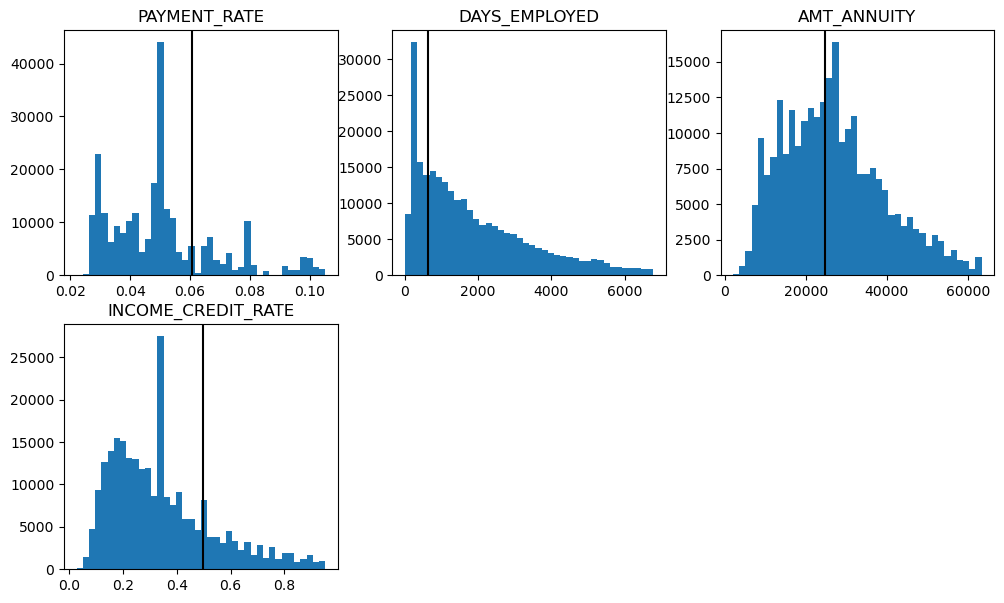

In [134]:
j=1
fig = plt.figure(figsize=(12, 7))
for i in result['Distributions']:
    ax = fig.add_subplot(2, 3, j)
    h = ax.hist(result['Distributions'][i], bins=40)
    plt.axvline(result['User info'][i], c='k')
    ax.set_title(i)
    j += 1

plt.show()

In [117]:
names_main_features = []
for i in result['Explainer map']['Feature_idx']:
    names_main_features.append(feature_list[i])

names_main_features

['NAME_CONTRACT_TYPE',
 'INCOME_CREDIT_RATE',
 'PAYMENT_RATE',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY',
 'CNT_CHILDREN']

In [120]:
feat_to_plot = [i for i in result['Distributions'] if i in names_main_features]
feat_to_plot

['PAYMENT_RATE', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'INCOME_CREDIT_RATE']